# Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset

In [2]:
df=pd.read_csv("C:\\Users\\mevee\\Downloads\\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.size

140000

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# duplicate values

In [9]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# unique values

In [10]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [11]:
for i in df.select_dtypes(include='object'):
    print(i)
    print(df[i].unique())

Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography
['France' 'Spain' 'Germany']
Gender
['Female' 'Male']


# removing unwanted columns

In [12]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# describre

In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


C:\Users\mevee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

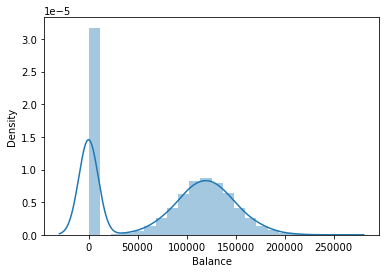

In [15]:
sns.distplot(df.Balance)

C:\Users\mevee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

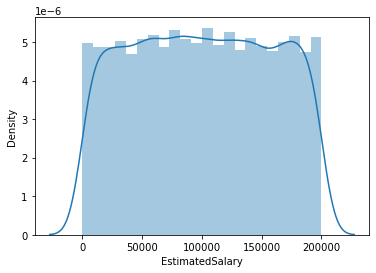

In [16]:
sns.distplot(df.EstimatedSalary)

C:\Users\mevee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

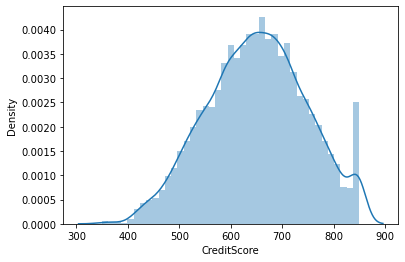

In [17]:
sns.distplot(df.CreditScore)

<AxesSubplot:>

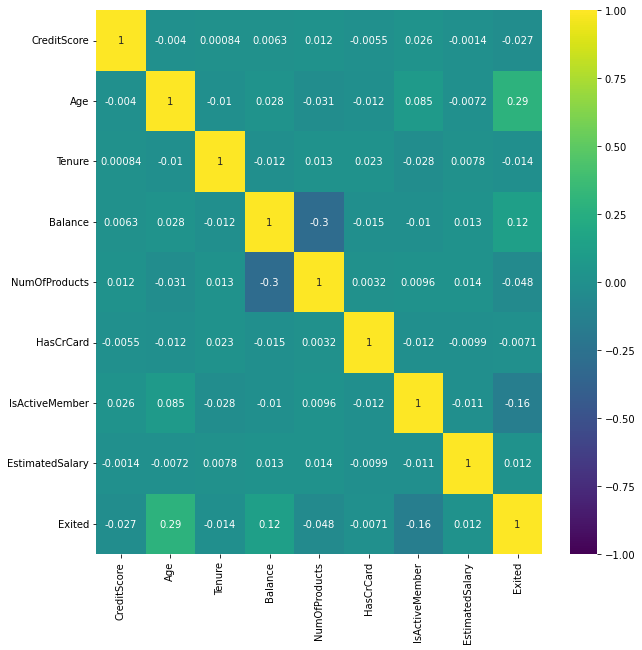

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis",vmin=-1,vmax=1)

# converting all values into numerical form

In [19]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [20]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender', 'Geography'])

In [21]:
one_hot_encoded_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


# Smote for balancing the data

In [22]:
target_col = ["Exited"]

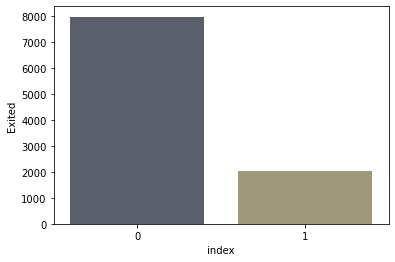

In [26]:
xx = one_hot_encoded_data[target_col[0]].value_counts().reset_index()
sns.barplot(x = "index", y = "Exited", data=xx, palette = "cividis");

In [27]:
from imblearn.over_sampling import SMOTE

In [29]:
col_names = list(one_hot_encoded_data.columns)
col_names.remove(target_col[0])

x = one_hot_encoded_data[col_names]
y = one_hot_encoded_data[target_col[0]]

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)


one_hot_encoded_data = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
one_hot_encoded_data.columns = col_names + target_col
one_hot_encoded_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,42,2,0.000000,1,1,1,101348.880000,1,0,1,0,0,1
1,608,41,1,83807.860000,1,0,1,112542.580000,1,0,0,0,1,0
2,502,42,8,159660.800000,3,1,0,113931.570000,1,0,1,0,0,1
3,699,39,1,0.000000,2,0,0,93826.630000,1,0,1,0,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,648,29,2,182429.951369,2,0,1,40159.190141,0,1,0,0,0,1
15922,596,34,6,0.000000,1,0,0,95160.606937,0,1,0,0,0,1
15923,797,32,1,211494.891343,1,0,0,190391.519380,0,0,1,0,0,1
15924,498,40,4,80578.009471,1,0,0,88747.618999,0,0,0,0,0,1


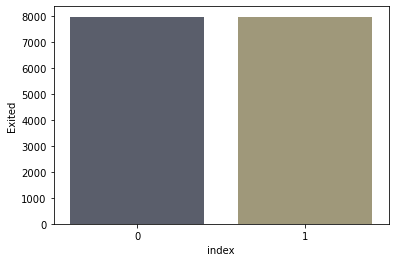

In [31]:
xx = one_hot_encoded_data[target_col[0]].value_counts().reset_index()
sns.barplot(x = "index", y = "Exited", data=xx, palette = "cividis");

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
scaler.fit(one_hot_encoded_data.drop(columns=['Exited']))

StandardScaler()

In [36]:
scaled_features=scaler.transform(one_hot_encoded_data.drop(columns=['Exited']))

In [37]:
x=one_hot_encoded_data.drop(['Exited'],axis=1)
y=one_hot_encoded_data.Exited

In [38]:
data=pd.DataFrame(scaled_features,columns=x.columns)

In [39]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.323630,0.098061,-1.031815,-1.336986,-0.736657,0.781226,1.297112,0.010576,1.228341,-0.842228,1.254966,-0.573048,-0.463963
1,-0.444159,-0.001832,-1.399568,0.030262,-0.736657,-1.280040,1.297112,0.205080,1.228341,-0.842228,-0.796834,-0.573048,2.155346
2,-1.605616,0.098061,1.174704,1.267732,2.740523,0.781226,-0.770943,0.229216,1.228341,-0.842228,1.254966,-0.573048,-0.463963
3,0.552941,-0.201616,-1.399568,-1.336986,1.001933,-1.280040,-0.770943,-0.120132,1.228341,-0.842228,1.254966,-0.573048,-0.463963
4,2.207468,0.197953,-1.031815,0.710607,-0.736657,0.781226,1.297112,-0.376302,1.228341,-0.842228,-0.796834,-0.573048,2.155346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,-0.005873,-1.200539,-1.031815,1.639189,1.001933,-1.280040,1.297112,-1.052670,-0.814106,1.187327,-0.796834,-0.573048,-0.463963
15922,-0.575645,-0.701077,0.439198,-1.336986,-0.736657,-1.280040,-0.770943,-0.096953,-0.814106,1.187327,-0.796834,-0.573048,-0.463963
15923,1.626740,-0.900862,-1.399568,2.113357,-0.736657,-1.280040,-0.770943,1.557802,-0.814106,-0.842228,1.254966,-0.573048,-0.463963
15924,-1.649444,-0.101724,-0.296308,-0.022430,-0.736657,-1.280040,-0.770943,-0.208386,-0.814106,-0.842228,-0.796834,-0.573048,-0.463963


# Model selection

# Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,y)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()

In [44]:
lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
pred=lr.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [49]:
print(accuracy_score(pred,y_test)*100)

82.77247614264189


In [50]:
print(confusion_matrix(pred,y_test))

[[1769  477]
 [ 209 1527]]


In [51]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      2246
           1       0.76      0.88      0.82      1736

    accuracy                           0.83      3982
   macro avg       0.83      0.83      0.83      3982
weighted avg       0.84      0.83      0.83      3982



# K nearest neighbor

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier(n_neighbors=3)

In [55]:
knn

KNeighborsClassifier(n_neighbors=3)

In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
pred1=knn.predict(x_test)

In [59]:
print(accuracy_score(pred1,y_test)*100)

85.05775991963837


In [60]:
print(confusion_matrix(pred1,y_test))

[[1720  337]
 [ 258 1667]]


In [61]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2057
           1       0.83      0.87      0.85      1925

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.85      3982
weighted avg       0.85      0.85      0.85      3982

